In [16]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [17]:
#READING THE CSV FILE
data_frame = pd.read_csv("Final.csv")


In [18]:
data_frame.head()



,Unnamed: 0,mean_H,mean_S,mean_V,stddev_H,stddev_S,stddev_V,entropy_H,entropy_S,entropy_V,Skew_H,Skew_S,Skew_V,Kurtosis_H,Kurtosis_S,Kurtosis_V,label,Color Code,Ripeness Code,Uniformity Code
0,IMG_20170609_121501.jpg,103.625344,150.115251,185.511408,2.719907,31.792205,36.967909,2.425289,4.874979,4.936882,-10.757538,0.999510,-1.349998,490.188907,1.812756,3.140637,NaN,3,R,W
1,IMG_20170609_121539.jpg,103.761329,150.645503,178.679519,3.103255,30.959667,37.815029,2.555942,4.849467,4.979512,-12.659618,0.943212,-1.279067,525.264241,1.810682,2.883282,NaN,3,R,W
2,IMG_20170609_121556.jpg,103.355815,148.943916,186.734285,2.117603,29.802781,33.560293,2.178525,4.812019,4.862720,-3.603895,0.981365,-1.246027,311.185592,1.952969,3.156205,NaN,3,R,W
3,IMG_20170609_121604.jpg,103.389273,149.850456,183.145827,3.249377,31.697308,36.858431,2.601241,4.871880,4.944156,-16.587754,0.856413,-1.294449,561.072469,1.733411,3.104665,NaN,3,R,W
4,IMG_20170609_121626.jpg,103.641312,145.893100,186.715184,2.081984,30.483949,35.004858,2.161499,4.835071,4.893274,-1.779351,1.032159,-1.119625,254.469867,1.896333,2.426695,NaN,3,R,W


In [19]:
data_frame.describe()

,mean_H,mean_S,mean_V,stddev_H,stddev_S,stddev_V,entropy_H,entropy_S,entropy_V,Skew_H,Skew_S,Skew_V,Kurtosis_H,Kurtosis_S,Kurtosis_V,label
count,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,0.0
mean,103.629875,145.824624,185.239729,2.245704,28.021184,33.449426,2.219000,4.749277,4.863085,-6.808514,1.055820,-1.191659,375.756888,2.503468,2.848907,NaN
std,0.545450,4.211986,2.928877,0.437090,1.789274,2.347932,0.185089,0.063683,0.059605,5.756273,0.151362,0.155208,214.510909,0.598855,0.613102,NaN
min,102.156214,130.973081,174.636731,1.422954,21.836112,26.312029,1.791807,4.502874,4.665713,-22.497717,0.515488,-1.698482,1.023094,1.071121,0.522047,NaN
25%,103.459725,143.651279,183.464629,1.942200,26.825935,31.714238,2.093514,4.708351,4.822863,-10.914694,0.955874,-1.296060,192.387005,2.113861,2.438570,NaN
50%,103.708289,145.963151,185.306877,2.165127,27.952428,33.362815,2.200156,4.748797,4.863928,-5.657036,1.040600,-1.196838,372.004506,2.370933,2.823511,NaN
75%,103.912724,148.816967,187.130345,2.456213,29.233544,34.946548,2.324375,4.793325,4.902087,-1.688719,1.145761,-1.081695,537.771976,2.798349,3.241231,NaN
max,105.083334,155.368865,195.132047,3.660065,33.469954,41.686307,2.719811,4.924542,5.063917,1.408115,1.617062,-0.672964,1015.984269,5.625081,5.535055,NaN


In [20]:
#CREATING THE APPROPRIATE VECTORS FOR CLASSIFICATION
names  = data_frame.iloc[: , 0]
X = data_frame.iloc[:, [7,8,9,11,12,13]]
Y = data_frame.iloc[: , 18]


In [21]:
#LABEL ENCODING THE TARGET VALUES
label = LabelEncoder()
Y_new = label.fit_transform(Y)


In [22]:
#CREATING TRAINING AND TESTING DATA
X_train , X_test , Y_train , Y_test = train_test_split(X , Y_new,test_size = 0.33 , random_state = 42)
#dtrain = xgb.DMatrix(X_train, label=Y_train)
#dtest = xgb.DMatrix(X_test, label=Y_test)

In [23]:
classifier = xgb.XGBClassifier(learning_rate= 0.1 ,objective= 'multi:softmax' ,
                               num_class = 5,random_state= 42 , n_estimators = 200
                               , booster = 'gbtree')


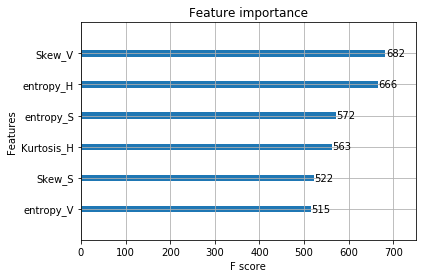

In [24]:
#FITTING THE CLASSIFIER
classifier.fit(X_train , Y_train)
#PLOTTING THE IMPORTANCE OF THE FEATURES
ax = xgb.plot_importance(classifier)


In [25]:
#PREDICTION
y_pred = classifier.predict(X_test)


C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [26]:
#ACCURACY OF THE MODEL
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test , y_pred)*100
print("ACCURACY : {}".format(accuracy))


ACCURACY : 70.23255813953489


In [27]:
print(label.inverse_transform(y_pred))

['C' 'O' 'O' 'C' 'R' 'R' 'C' 'R' 'R' 'O' 'O' 'R' 'C' 'R' 'O' 'C' 'C' 'R'
 'R' 'R' 'C' 'R' 'C' 'C' 'C' 'C' 'O' 'R' 'C' 'R' 'O' 'R' 'R' 'O' 'C' 'R'
 'R' 'O' 'R' 'R' 'R' 'O' 'C' 'R' 'C' 'R' 'C' 'C' 'C' 'C' 'C' 'R' 'R' 'C'
 'R' 'R' 'R' 'C' 'R' 'O' 'R' 'R' 'C' 'C' 'C' 'R' 'R' 'C' 'R' 'O' 'C' 'C'
 'R' 'C' 'O' 'R' 'O' 'R' 'R' 'R' 'C' 'R' 'R' 'C' 'C' 'R' 'C' 'C' 'C' 'C'
 'R' 'R' 'R' 'C' 'R' 'R' 'C' 'R' 'C' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'C'
 'C' 'R' 'C' 'C' 'R' 'C' 'C' 'O' 'R' 'C' 'C' 'O' 'O' 'C' 'C' 'R' 'C' 'O'
 'C' 'R' 'R' 'C' 'R' 'R' 'O' 'O' 'R' 'O' 'C' 'C' 'O' 'C' 'M' 'O' 'R' 'R'
 'R' 'C' 'R' 'C' 'R' 'C' 'R' 'R' 'R' 'R' 'R' 'O' 'C' 'C' 'O' 'C' 'O' 'R'
 'R' 'O' 'C' 'R' 'M' 'C' 'C' 'R' 'R' 'R' 'R' 'O' 'C' 'O' 'C' 'R' 'C' 'R'
 'R' 'R' 'C' 'C' 'R' 'R' 'O' 'O' 'C' 'R' 'O' 'O' 'O' 'R' 'O' 'R' 'C' 'O'
 'R' 'O' 'R' 'C' 'C' 'O' 'C' 'C' 'R' 'R' 'R' 'C' 'R' 'C' 'C' 'C' 'R']


C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
